In [ ]:
# from google.colab import drive
# drive.mount("/content/gdrive")

In [ ]:
# path_googledrive = "gdrive/MyDrive/Colab Notebooks/homeloan/"

In [ ]:
path = r"E:\Users\LENOVO\Desktop\newwork\homeproject\home-credit-default-risk"

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
application_train = pd.read_csv(path + "/application_train.csv")
application_test = pd.read_csv(path + "/application_test.csv")

bureau = pd.read_csv(path + "/bureau.csv")
bureau_balance = pd.read_csv(path + "/bureau_balance.csv")

credit_card_balance = pd.read_csv(path + "/credit_card_balance.csv")
installments_payments = pd.read_csv(path + "/installments_payments.csv")

POS_CASH_balance = pd.read_csv(path + "/POS_CASH_balance.csv")
previous_application = pd.read_csv(path + "/previous_application.csv")

In [ ]:
train = pd.read_csv(path + "/application_train.csv")

In [ ]:
dataframe_dict = {"application_train": application_train,
                  "application_test": application_test,
                  "bureau": bureau,
                  "bureau_balance" : bureau_balance,
                  "credit_card_balance": credit_card_balance,
                  "installments_payments": installments_payments,
                  "POS_CASH_balance": POS_CASH_balance,
                  "previous_application": previous_application               
    
}


Basic data checks


shape

In [ ]:
for key in dataframe_dict:
    print("Shape of {0} is {1}".format(key, dataframe_dict[key].shape))

Shape of application_train is (307511, 122)
Shape of application_test is (48744, 121)
Shape of bureau is (1716428, 17)
Shape of bureau_balance is (27299925, 3)
Shape of credit_card_balance is (3840312, 23)
Shape of installments_payments is (13605401, 8)
Shape of POS_CASH_balance is (10001358, 8)
Shape of previous_application is (1670214, 37)


In [ ]:
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


Removing duplicates

In [ ]:
application_train.drop_duplicates(inplace= True)
bureau.drop_duplicates(inplace= True)
# bureau_balance.drop_duplicates(inplace= True)
# credit_card_balance.drop_duplicates(inplace= True)
# installments_payments.drop_duplicates(inplace= True)
# POS_CASH_balance.drop_duplicates(inplace= True)
previous_application.drop_duplicates(inplace= True)

NameError: name 'application_train' is not defined

<AxesSubplot:xlabel='CODE_GENDER', ylabel='count'>

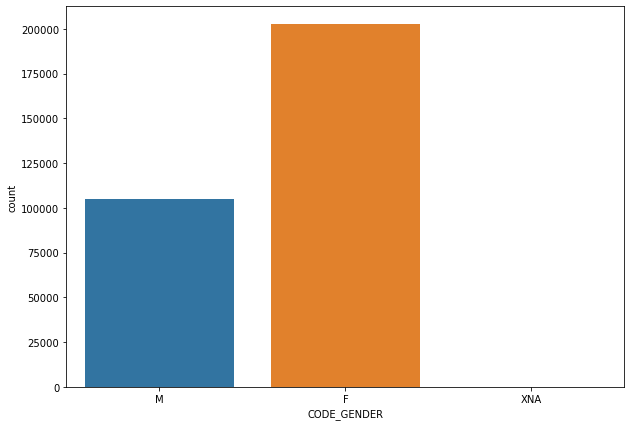

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))
sns.countplot(x='CODE_GENDER',data=train)

In [ ]:
print("Surprisingly, females are the highest borrowers with counts:\n{}".format(train.CODE_GENDER.value_counts()))

Surprisingly, females are the highest borrowers with counts:
F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64


<AxesSubplot:xlabel='TARGET', ylabel='count'>

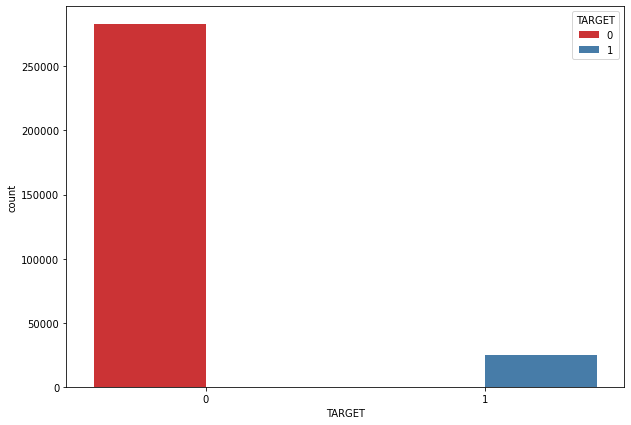

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))
sns.countplot(x ='TARGET',data=train, hue='TARGET',palette="Set1")

<AxesSubplot:xlabel='TARGET', ylabel='count'>

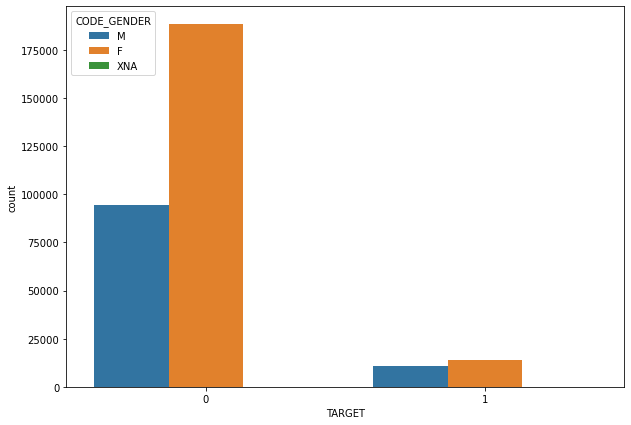

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))
sns.countplot(x='TARGET',hue='CODE_GENDER',data=train)

<AxesSubplot:xlabel='CODE_GENDER', ylabel='count'>

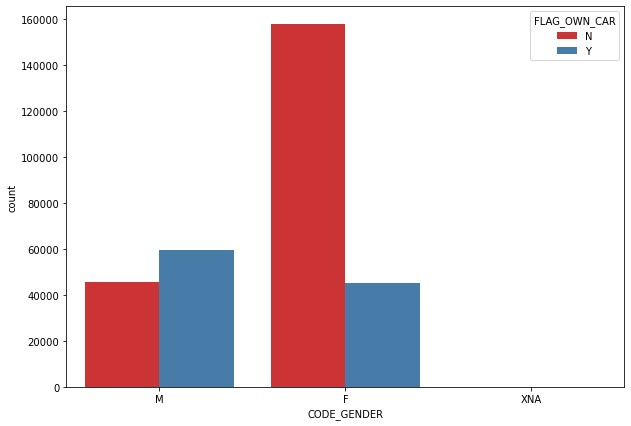

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))
sns.countplot(x='CODE_GENDER', hue='FLAG_OWN_CAR', data=train,palette="Set1")

<AxesSubplot:xlabel='CODE_GENDER', ylabel='OWN_CAR_AGE'>

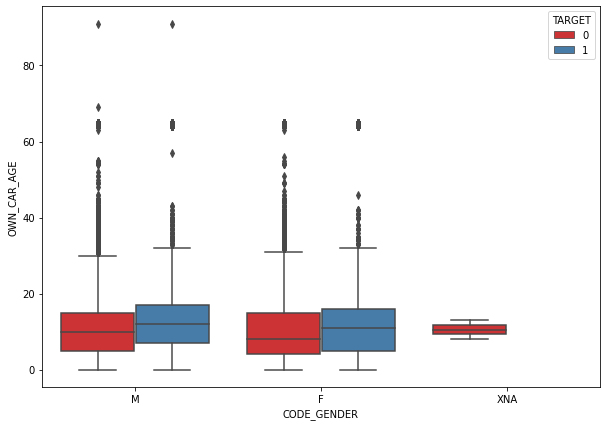

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))
sns.boxplot(x='CODE_GENDER',y='OWN_CAR_AGE',hue='TARGET',data=train,palette="Set1")

<AxesSubplot:xlabel='CODE_GENDER', ylabel='OWN_CAR_AGE'>

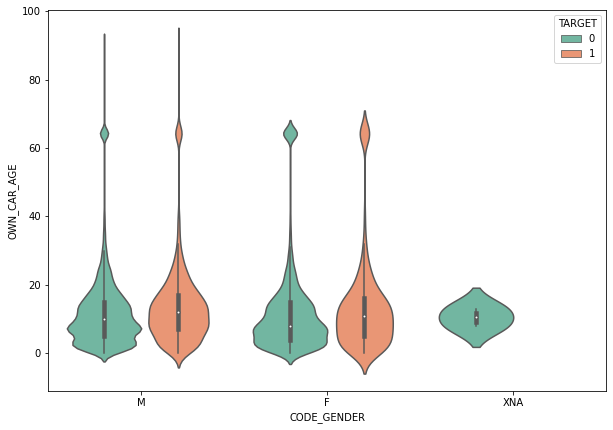

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))
sns.violinplot(x='CODE_GENDER',y='OWN_CAR_AGE',hue='TARGET',data=train,palette="Set2")

Primary key check

<AxesSubplot:xlabel='OWN_CAR_AGE', ylabel='Density'>

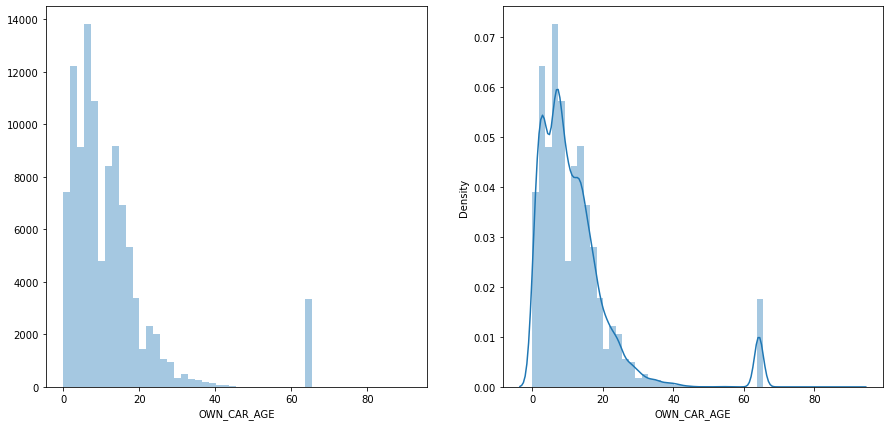

In [ ]:
fig, ax = plt.subplots(ncols=2,nrows=1,figsize=(15,7))
plt.subplot(1,2,1)
sns.distplot(train['OWN_CAR_AGE'].dropna(),norm_hist=False,kde=False)
plt.subplot(1,2,2)
sns.distplot(train['OWN_CAR_AGE'].dropna(),norm_hist=False,kde=True)

<AxesSubplot:xlabel='CODE_GENDER', ylabel='CNT_CHILDREN'>

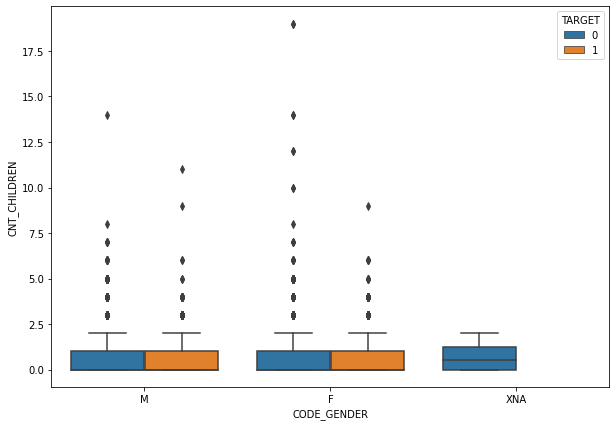

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))
sns.boxplot(x='CODE_GENDER',y='CNT_CHILDREN',hue='TARGET',data=train)

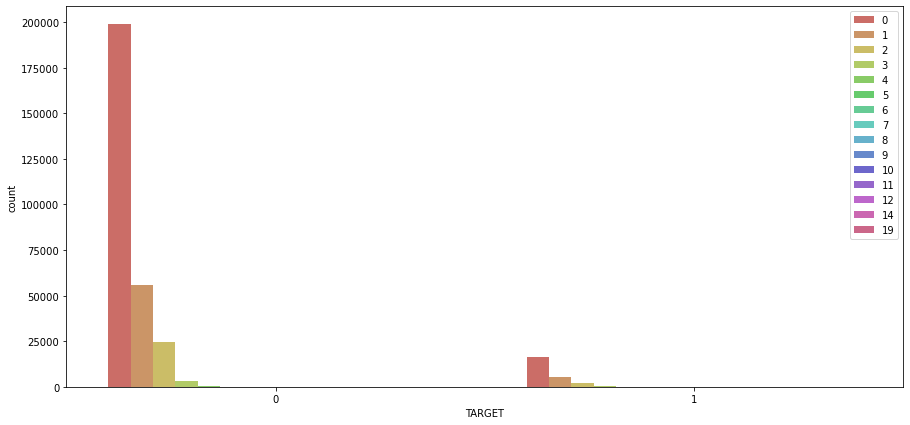

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
sns.countplot(x='TARGET',hue='CNT_CHILDREN',data=train,palette="hls")
plt.legend(loc=1)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Laborers'),
  Text(1, 0, 'Core staff'),
  Text(2, 0, 'Accountants'),
  Text(3, 0, 'Managers'),
  Text(4, 0, 'Drivers'),
  Text(5, 0, 'Sales staff'),
  Text(6, 0, 'Cleaning staff'),
  Text(7, 0, 'Cooking staff'),
  Text(8, 0, 'Private service staff'),
  Text(9, 0, 'Medicine staff'),
  Text(10, 0, 'Security staff'),
  Text(11, 0, 'High skill tech staff'),
  Text(12, 0, 'Waiters/barmen staff'),
  Text(13, 0, 'Low-skill Laborers'),
  Text(14, 0, 'Realty agents'),
  Text(15, 0, 'Secretaries'),
  Text(16, 0, 'IT staff'),
  Text(17, 0, 'HR staff')])

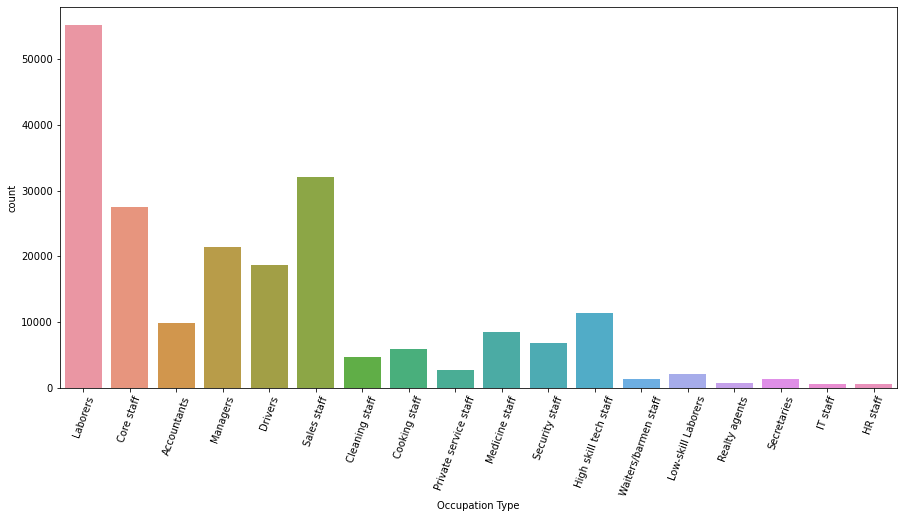

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
sns.countplot(x='OCCUPATION_TYPE',data=train)
plt.xlabel("Occupation Type")
plt.xticks(rotation=70)

Text(0, 0.5, 'Average Annual family income')

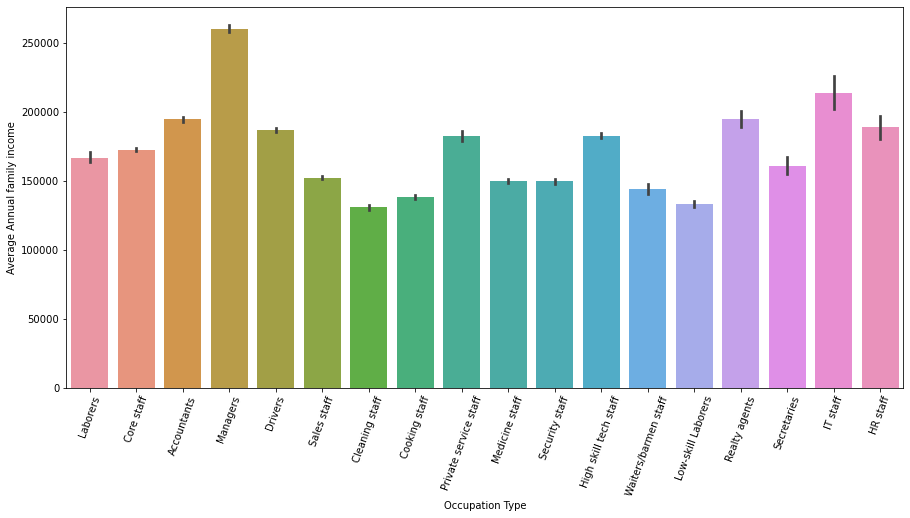

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
sns.barplot(x='OCCUPATION_TYPE',y='AMT_INCOME_TOTAL',data=train)
plt.xticks(rotation=70)
plt.xlabel("Occupation Type")
plt.ylabel("Average Annual family income")

Text(0.5, 0, 'Occupation Type')

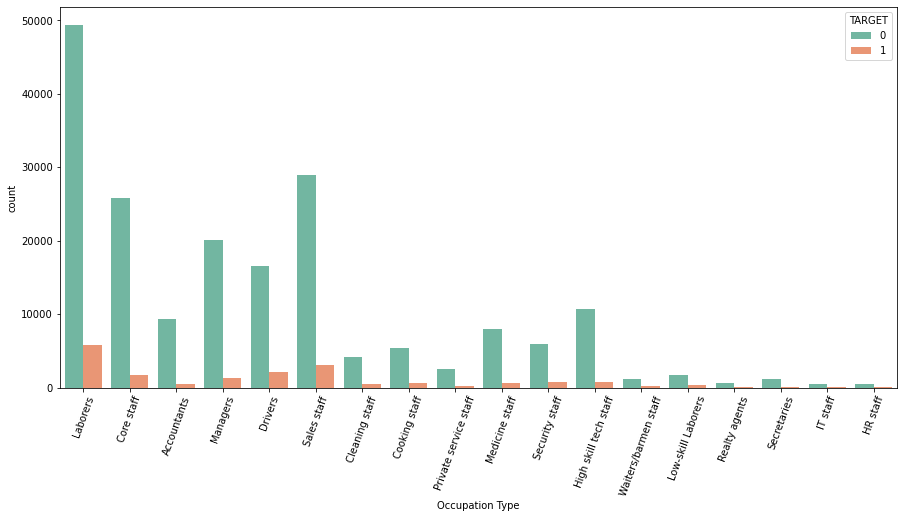

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
sns.countplot(x='OCCUPATION_TYPE',hue='TARGET',data=train,palette="Set2")
plt.xticks(rotation=70)
plt.xlabel("Occupation Type")

In [ ]:
# get the number of people having occupation type and target grouped.
Occupation_df = pd.DataFrame(data=train.groupby(['OCCUPATION_TYPE','TARGET']).count()['SK_ID_CURR'])
Occupation_df = Occupation_df.reset_index() 
value_counts = Occupation_df['SK_ID_CURR'].values
def repayers_to_applicants_ratio(values):
    """
    Finds the ratio of Repayers to Applicants. This kind of is a 
    measure for safety. Larger the value better the applicant - More 
    safe for the company to lend loan to this category of workers.
    
    values: array of entires whose counts are given
    returns the repayers to applicants ratio. 
    
    precondition: The counts are such that the targets alligned are
    in order 0 and 1
    """
    flag = 1
    ratios = []
    for count in range(len(values)):
        if flag == 1:
            current_number = values[count]
            next_number = values[count+1]
            ratios.append(current_number/(current_number+next_number))
            ratios.append(current_number/(current_number+next_number))
        flag=flag*-1
    return ratios 
Occupation_df['Ratio R/A'] = repayers_to_applicants_ratio(value_counts)


In [ ]:
Occupation_ratio_df = Occupation_df.groupby(['OCCUPATION_TYPE','Ratio R/A']).count().drop(['TARGET', 'SK_ID_CURR'],axis=1)
Occupation_ratio_df = Occupation_ratio_df.reset_index() 
Occupation_ratio_df = Occupation_ratio_df.sort_values(['Ratio R/A'],ascending=False)
Occupation_ratio_df

,OCCUPATION_TYPE,Ratio R/A
0,Accountants,0.951697
6,High skill tech staff,0.938401
10,Managers,0.937860
3,Core staff,0.936960
5,HR staff,0.936057
7,IT staff,0.935361
12,Private service staff,0.934012
11,Medicine staff,0.932998
15,Secretaries,0.929502
13,Realty agents,0.921438


Text(0, 0.5, 'Mean R/A Ratio')

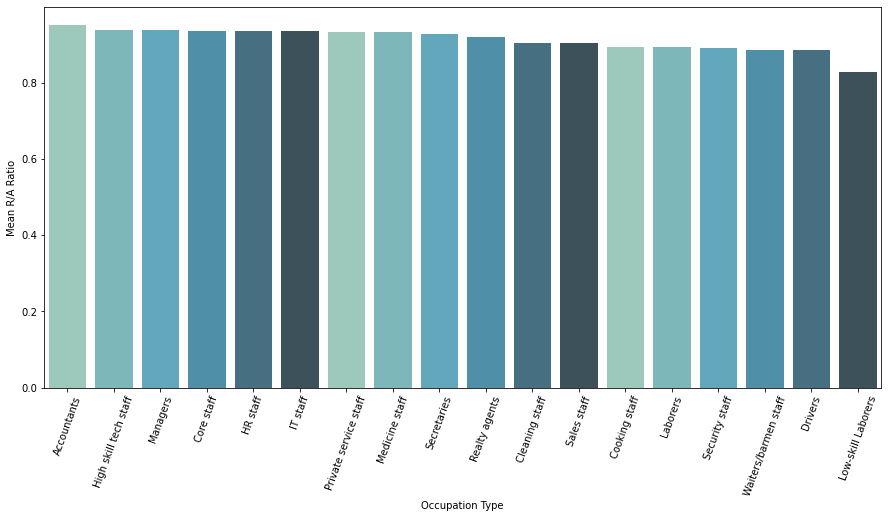

In [ ]:
fig,ax = plt.subplots(figsize = (15,7))
sns.barplot(x='OCCUPATION_TYPE',y='Ratio R/A',data=Occupation_ratio_df,palette=sns.color_palette("GnBu_d"))
plt.xticks(rotation=70)
plt.xlabel("Occupation Type")
plt.ylabel("Mean R/A Ratio")

In [ ]:
train = pd.merge(left=train,right=Occupation_ratio_df,on='OCCUPATION_TYPE')

Text(0.5, 0, 'Gender')

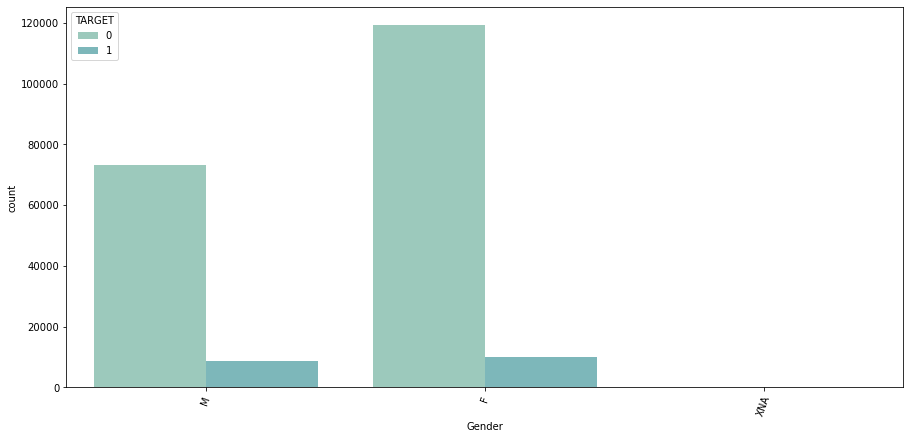

In [ ]:
# Find out what is the probability that an applicant will return given that he/she is a male/Female respectively.
fig,ax = plt.subplots(figsize = (15,7))
sns.countplot(x='CODE_GENDER',data=train,hue='TARGET',palette=sns.color_palette("GnBu_d"))
plt.xticks(rotation=70)
plt.xlabel("Gender")

In [ ]:
pd.DataFrame(train.groupby(['CODE_GENDER','TARGET']).count()['SK_ID_CURR']).reset_index() 

,CODE_GENDER,TARGET,SK_ID_CURR
0,F,0,119311
1,F,1,9971
2,M,0,73260
3,M,1,8576
4,XNA,0,2


In [ ]:
gender_repay_ratio = pd.DataFrame({"CODE_GENDER":['M','F'],"GR/A":[0.8952,0.9228]})
train = pd.merge(left=train,right=gender_repay_ratio,on='CODE_GENDER')
# EGR/A stands for employment gender repayment ratio.


In [ ]:
train['EGR/A'] = train['Ratio R/A']*train['GR/A']

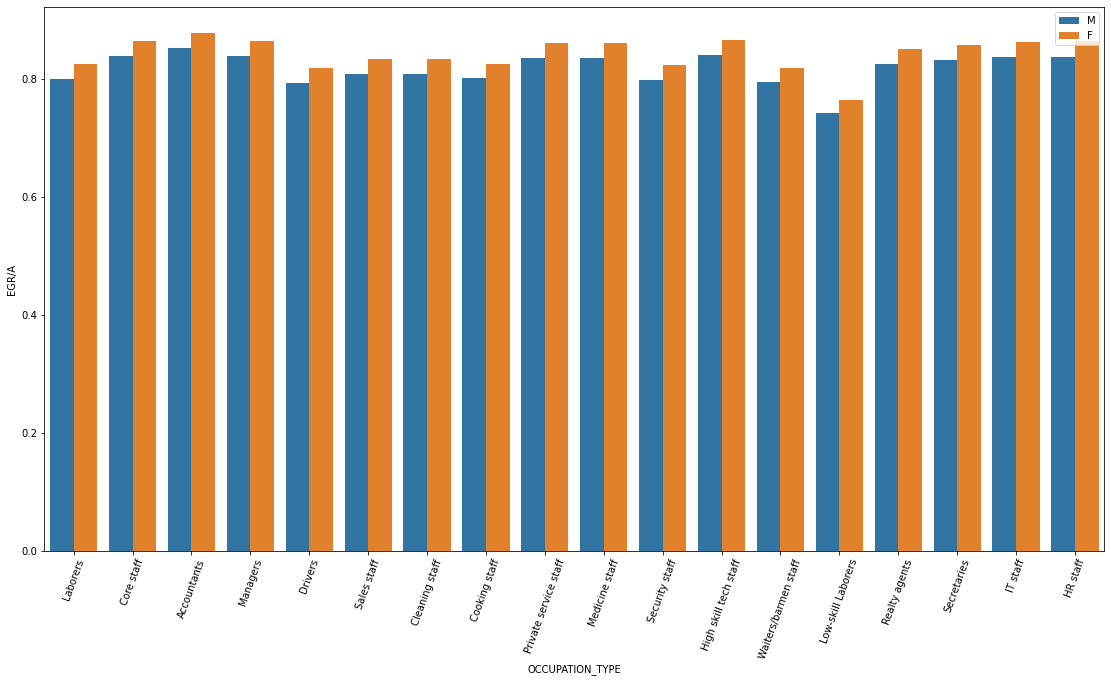

In [ ]:
fig,ax = plt.subplots(figsize = (19,10))
plt.xticks(rotation=70)
sns.barplot(x='OCCUPATION_TYPE',y='EGR/A',hue='CODE_GENDER',data=train)
plt.legend(loc=1)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Laborers'),
  Text(1, 0, 'Core staff'),
  Text(2, 0, 'Accountants'),
  Text(3, 0, 'Managers'),
  Text(4, 0, 'Drivers'),
  Text(5, 0, 'Sales staff'),
  Text(6, 0, 'Cleaning staff'),
  Text(7, 0, 'Cooking staff'),
  Text(8, 0, 'Private service staff'),
  Text(9, 0, 'Medicine staff'),
  Text(10, 0, 'Security staff'),
  Text(11, 0, 'High skill tech staff'),
  Text(12, 0, 'Waiters/barmen staff'),
  Text(13, 0, 'Low-skill Laborers'),
  Text(14, 0, 'Realty agents'),
  Text(15, 0, 'Secretaries'),
  Text(16, 0, 'IT staff'),
  Text(17, 0, 'HR staff')])

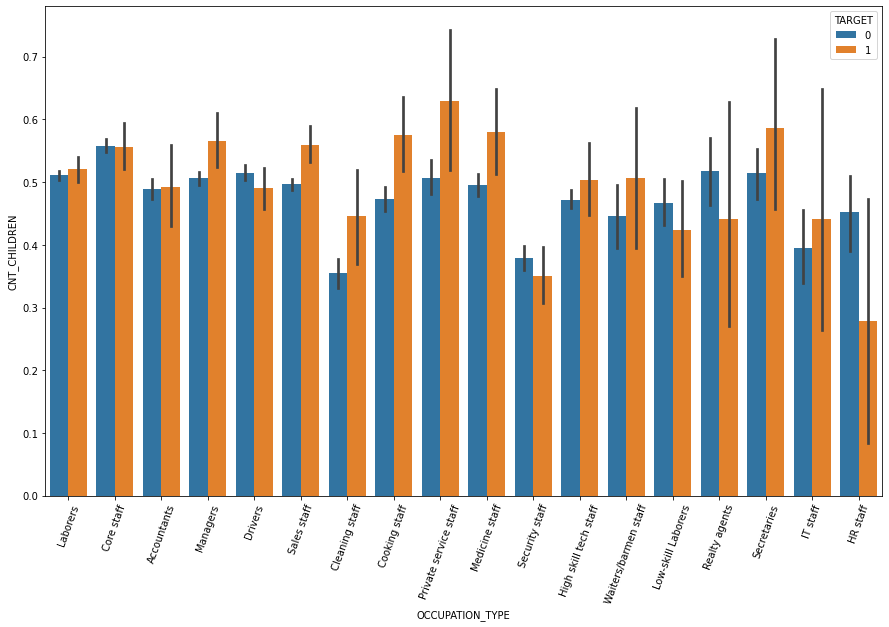

In [ ]:
fig, ax = plt.subplots(figsize=(15,9))
sns.barplot(x='OCCUPATION_TYPE',y='CNT_CHILDREN',hue='TARGET',data=train)
plt.xticks(rotation=70)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Laborers'),
  Text(1, 0, 'Core staff'),
  Text(2, 0, 'Accountants'),
  Text(3, 0, 'Managers'),
  Text(4, 0, 'Drivers'),
  Text(5, 0, 'Sales staff'),
  Text(6, 0, 'Cleaning staff'),
  Text(7, 0, 'Cooking staff'),
  Text(8, 0, 'Private service staff'),
  Text(9, 0, 'Medicine staff'),
  Text(10, 0, 'Security staff'),
  Text(11, 0, 'High skill tech staff'),
  Text(12, 0, 'Waiters/barmen staff'),
  Text(13, 0, 'Low-skill Laborers'),
  Text(14, 0, 'Realty agents'),
  Text(15, 0, 'Secretaries'),
  Text(16, 0, 'IT staff'),
  Text(17, 0, 'HR staff')])

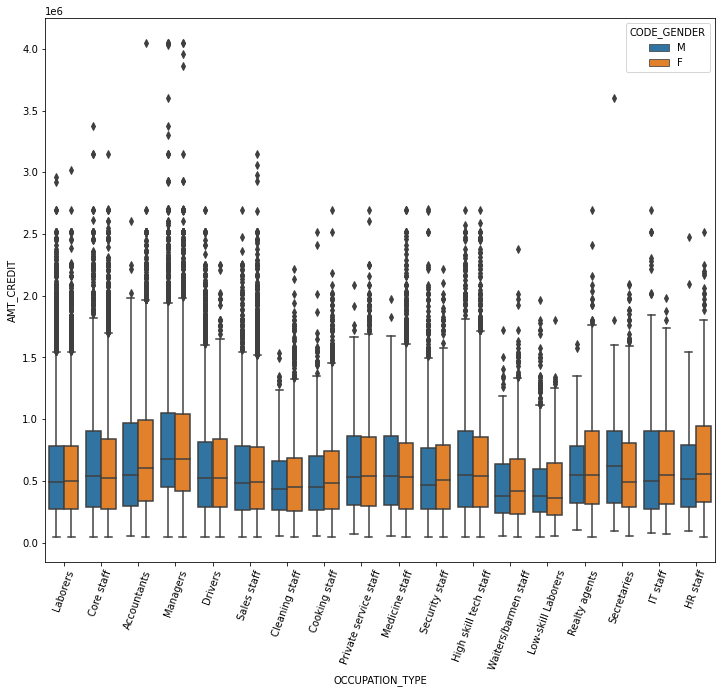

In [ ]:
plt.figure(figsize=(12,10))
sns.boxplot(x='OCCUPATION_TYPE',y='AMT_CREDIT',data=train,hue='CODE_GENDER')
plt.xticks(rotation=70)

<AxesSubplot:xlabel='FLAG_OWN_REALTY', ylabel='count'>

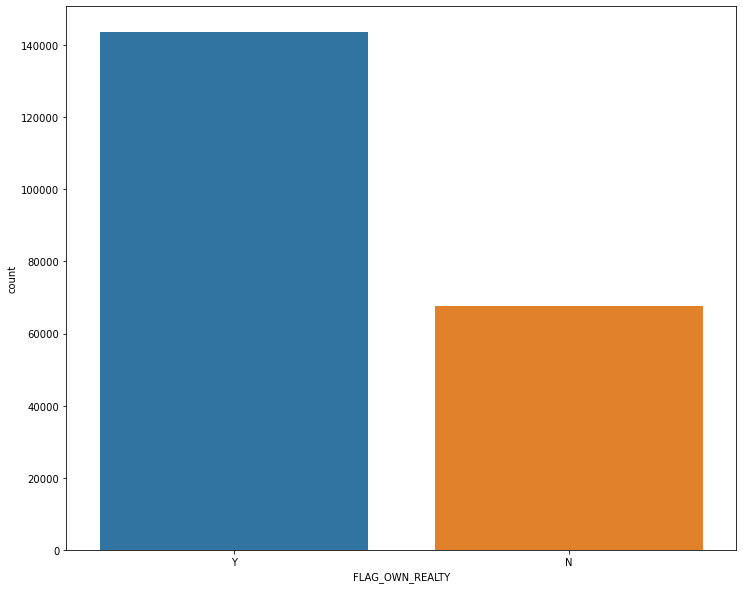

In [ ]:
plt.figure(figsize=(12,10))
sns.countplot(x='FLAG_OWN_REALTY', data=train)

<AxesSubplot:xlabel='TARGET', ylabel='count'>

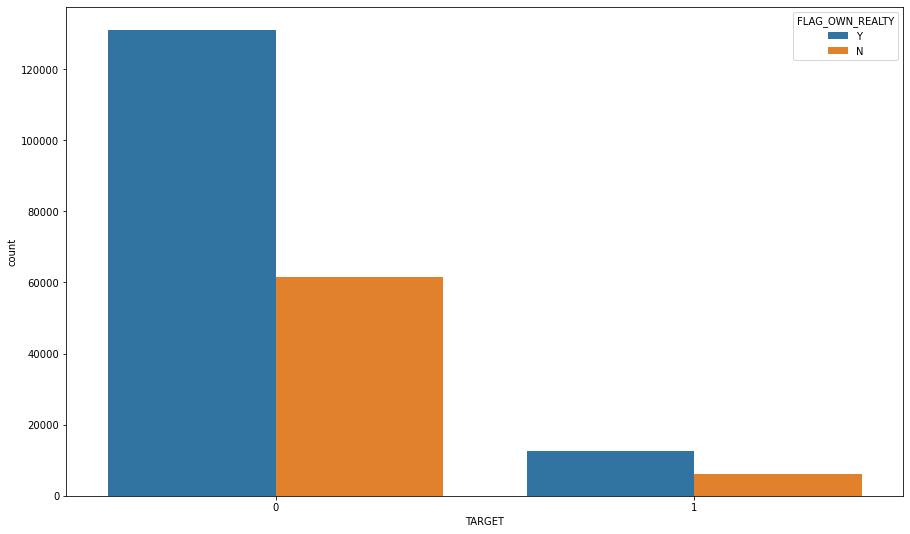

In [ ]:
fig, ax = plt.subplots(figsize=(15,9))
sns.countplot(x='TARGET',hue='FLAG_OWN_REALTY',data=train)

In [ ]:
reality_with_difficulty = len(train[(train['FLAG_OWN_REALTY']=='Y') & (train['TARGET']==1)])
reality_without_difficulty = len(train[(train['FLAG_OWN_REALTY']=='Y') & (train['TARGET']==0)])
no_reality_with_difficulty = len(train[(train['FLAG_OWN_REALTY']=='N') & (train['TARGET']==1)])
no_reality_without_difficulty = len(train[(train['FLAG_OWN_REALTY']=='N') & (train['TARGET']==0)])

In [ ]:
print("Defaulters with realestate % = ",100*reality_with_difficulty/(reality_with_difficulty+reality_without_difficulty))
print("Defaulters without realestate % = ",100*no_reality_with_difficulty/(no_reality_with_difficulty+no_reality_without_difficulty))

Defaulters with realestate % =  8.728533823590858
Defaulters without realestate % =  8.905509478672986


<AxesSubplot:xlabel='LIVINGAREA_MEDI', ylabel='Density'>

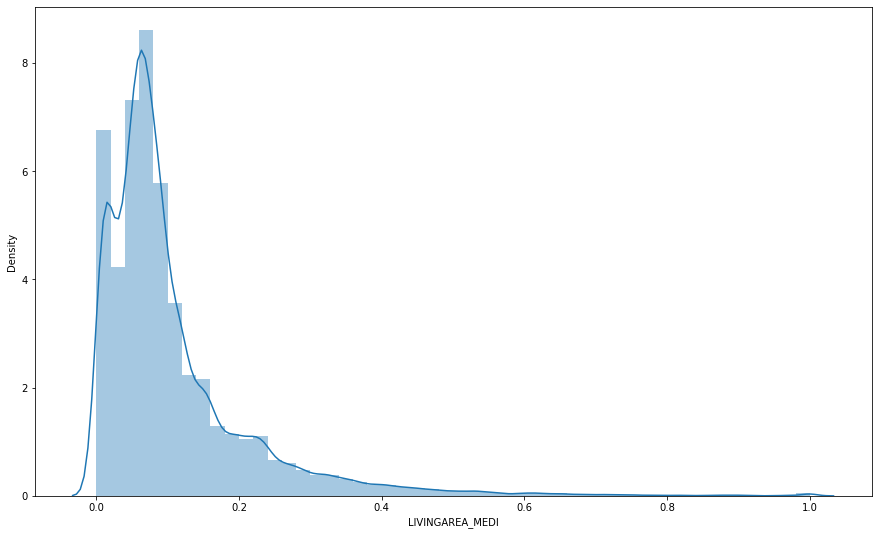

In [ ]:
fig, ax = plt.subplots(figsize=(15,9))
sns.distplot(train['LIVINGAREA_MEDI'].dropna())

<AxesSubplot:xlabel='TARGET', ylabel='FLOORSMAX_MEDI'>

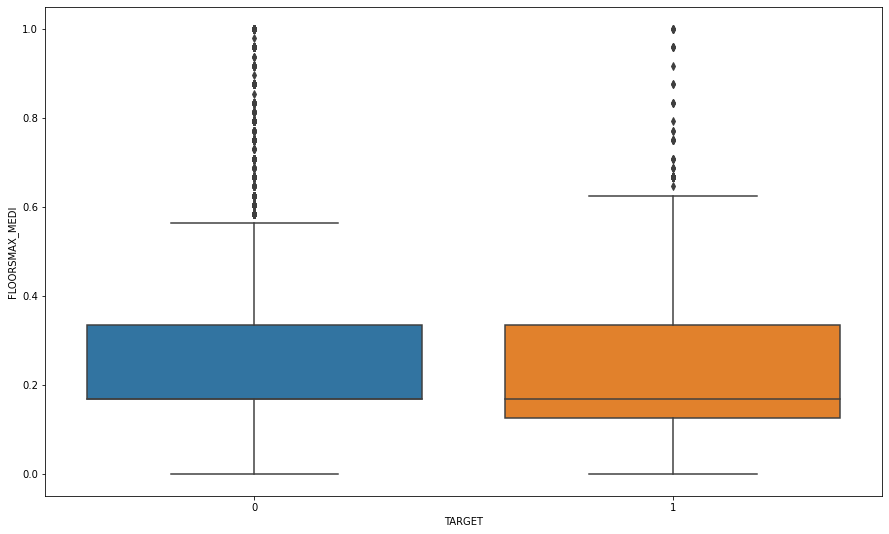

In [ ]:
fig, ax = plt.subplots(figsize=(15,9))
sns.boxplot(x='TARGET',y='FLOORSMAX_MEDI',data=train)

<AxesSubplot:xlabel='FLOORSMAX_MEDI', ylabel='Density'>

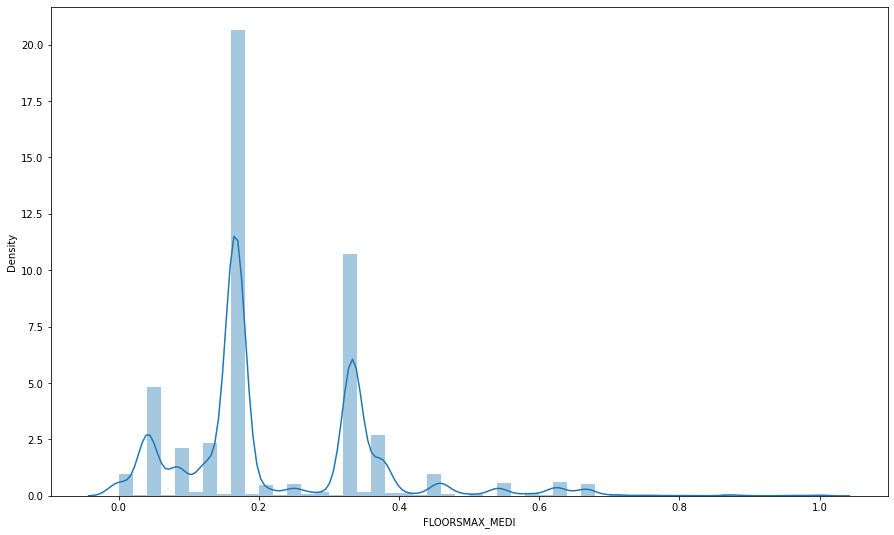

In [ ]:
fig, ax = plt.subplots(figsize=(15,9))
sns.distplot(train['FLOORSMAX_MEDI'].dropna())

In [ ]:
application_train.groupby(by=["SK_ID_CURR"]).size().reset_index(name="counts")['counts'].value_counts()

1    307511
Name: counts, dtype: int64

EDA

Application train

missing data

dropping all cols with <30% data

In [ ]:
application_train = application_train.replace({'':np.nan})
application_train = application_train.dropna(thresh=0.7*len(application_train), axis= 1)

In [ ]:
Miss = pd.DataFrame(columns=["Miss%"])
Miss["Miss%"]=((application_train.isnull().sum())*100/len(application_train))
Miss[Miss["Miss%"]>0]

,Miss%
AMT_ANNUITY,0.003902
AMT_GOODS_PRICE,0.090403
NAME_TYPE_SUITE,0.420148
CNT_FAM_MEMBERS,0.000650
EXT_SOURCE_2,0.214626
EXT_SOURCE_3,19.825307
OBS_30_CNT_SOCIAL_CIRCLE,0.332021
DEF_30_CNT_SOCIAL_CIRCLE,0.332021
OBS_60_CNT_SOCIAL_CIRCLE,0.332021
DEF_60_CNT_SOCIAL_CIRCLE,0.332021


Target class distribution

In [ ]:
application_train["TARGET"].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [ ]:
application_train["credit-income ratio"] =  application_train["AMT_CREDIT"] / application_train["AMT_INCOME_TOTAL"]

In [ ]:
application_train["credit-income ratio"].describe()

count    307511.000000
mean          3.957570
std           2.689728
min           0.004808
25%           2.018667
50%           3.265067
75%           5.159880
max          84.736842
Name: credit-income ratio, dtype: float64

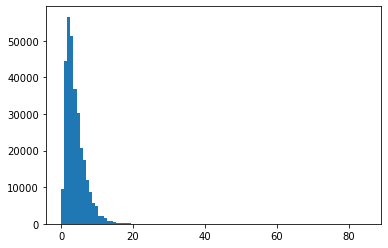

In [ ]:
plt.hist(application_train["credit-income ratio"],bins=100)
plt.show()

In [ ]:

application_train["Years_Employed"] =  application_train["DAYS_EMPLOYED"] / float(-365)
application_train.drop('DAYS_EMPLOYED', inplace=True, axis=1)

In [ ]:
application_train["Years_Employed"].describe()

count    307511.000000
mean       -174.835742
std         387.056895
min       -1000.665753
25%           0.791781
50%           3.323288
75%           7.561644
max          49.073973
Name: Years_Employed, dtype: float64

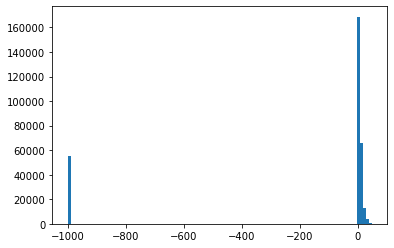

In [ ]:
plt.hist(application_train["Years_Employed"],bins=100)
plt.show()

<AxesSubplot:xlabel='CODE_GENDER', ylabel='count'>

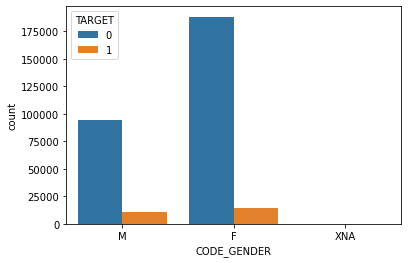

In [ ]:
sns.countplot(application_train['CODE_GENDER'],hue=application_train['TARGET'])

<AxesSubplot:xlabel='CNT_CHILDREN', ylabel='count'>

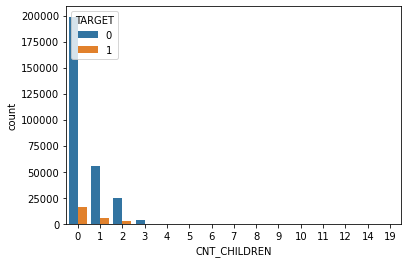

In [ ]:
sns.countplot(application_train['CNT_CHILDREN'],hue=application_train['TARGET'])

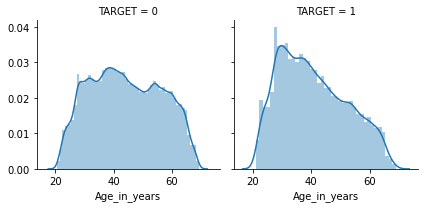

In [ ]:
application_train["Age_in_years"] = application_train['DAYS_BIRTH']/float(-365)
application_train.drop('DAYS_BIRTH', inplace=True, axis=1)
g = sns.FacetGrid(application_train, col='TARGET')
g.map(sns.distplot, 'Age_in_years')

<AxesSubplot:xlabel='TARGET', ylabel='count'>

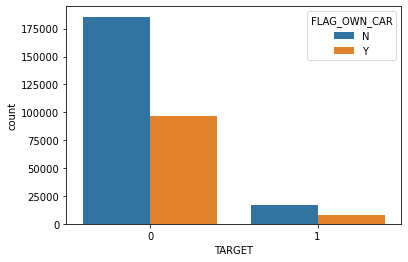

In [ ]:
sns.countplot(application_train['TARGET'],hue=application_train['FLAG_OWN_CAR'])

In [ ]:
application_train.loc[(application_train['TARGET']==0)]["ORGANIZATION_TYPE"].value_counts()

Business Entity Type 3    61669
XNA                       52384
Self-employed             34504
Other                     15408
Medicine                  10456
Government                 9678
Business Entity Type 2     9653
School                     8367
Trade: type 7              7091
Kindergarten               6396
Construction               5936
Business Entity Type 1     5497
Transport: type 4          4897
Industry: type 9           3143
Trade: type 3              3131
Industry: type 3           2930
Security                   2923
Housing                    2723
Military                   2499
Industry: type 11          2470
Bank                       2377
Police                     2224
Agriculture                2197
Transport: type 2          2032
Postal                     1975
Security Ministries        1878
Trade: type 2              1767
Restaurant                 1599
Services                   1471
University                 1262
Industry: type 7           1202
Transpor

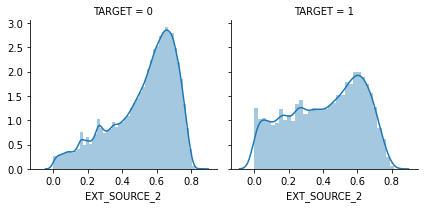

In [ ]:

g = sns.FacetGrid(application_train, col='TARGET')
g.map(sns.distplot, 'EXT_SOURCE_2')

In [ ]:
application_train.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION',
       'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DE

Bureau data

In [ ]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [ ]:
bureau.isnull().sum()

SK_ID_CURR                      0
SK_ID_BUREAU                    0
CREDIT_ACTIVE                   0
CREDIT_CURRENCY                 0
DAYS_CREDIT                     0
CREDIT_DAY_OVERDUE              0
DAYS_CREDIT_ENDDATE        105553
DAYS_ENDDATE_FACT          633653
AMT_CREDIT_MAX_OVERDUE    1124488
CNT_CREDIT_PROLONG              0
AMT_CREDIT_SUM                 13
AMT_CREDIT_SUM_DEBT        257669
AMT_CREDIT_SUM_LIMIT       591780
AMT_CREDIT_SUM_OVERDUE          0
CREDIT_TYPE                     0
DAYS_CREDIT_UPDATE              0
AMT_ANNUITY               1226791
dtype: int64

In [ ]:
bureau = bureau.replace({'':np.nan})
bureau = bureau.dropna(thresh=0.7*len(bureau), axis= 1)

In [ ]:
bureau.shape

(1716428, 13)

bureau_balance

In [ ]:
bureau_balance.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [ ]:
bureau_balance.isnull().sum()

SK_ID_BUREAU      0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

credit_card_balance

In [ ]:
credit_card_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [ ]:
credit_card_balance = credit_card_balance.replace({'':np.nan})
credit_card_balance = credit_card_balance.dropna(thresh=0.7*len(credit_card_balance), axis= 1)

In [ ]:
credit_card_balance.isnull().sum()

SK_ID_PREV                         0
SK_ID_CURR                         0
MONTHS_BALANCE                     0
AMT_BALANCE                        0
AMT_CREDIT_LIMIT_ACTUAL            0
AMT_DRAWINGS_ATM_CURRENT      749816
AMT_DRAWINGS_CURRENT               0
AMT_DRAWINGS_OTHER_CURRENT    749816
AMT_DRAWINGS_POS_CURRENT      749816
AMT_INST_MIN_REGULARITY       305236
AMT_PAYMENT_CURRENT           767988
AMT_PAYMENT_TOTAL_CURRENT          0
AMT_RECEIVABLE_PRINCIPAL           0
AMT_RECIVABLE                      0
AMT_TOTAL_RECEIVABLE               0
CNT_DRAWINGS_ATM_CURRENT      749816
CNT_DRAWINGS_CURRENT               0
CNT_DRAWINGS_OTHER_CURRENT    749816
CNT_DRAWINGS_POS_CURRENT      749816
CNT_INSTALMENT_MATURE_CUM     305236
NAME_CONTRACT_STATUS               0
SK_DPD                             0
SK_DPD_DEF                         0
dtype: int64

previous_application

In [ ]:
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
previous_application = previous_application.replace({'':np.nan})
previous_application = previous_application.dropna(thresh=0.7*len(previous_application), axis= 1)

In [ ]:
previous_application.isnull().sum()

SK_ID_PREV                          0
SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
AMT_ANNUITY                    372235
AMT_APPLICATION                     0
AMT_CREDIT                          1
AMT_GOODS_PRICE                385515
WEEKDAY_APPR_PROCESS_START          0
HOUR_APPR_PROCESS_START             0
FLAG_LAST_APPL_PER_CONTRACT         0
NFLAG_LAST_APPL_IN_DAY              0
NAME_CASH_LOAN_PURPOSE              0
NAME_CONTRACT_STATUS                0
DAYS_DECISION                       0
NAME_PAYMENT_TYPE                   0
CODE_REJECT_REASON                  0
NAME_CLIENT_TYPE                    0
NAME_GOODS_CATEGORY                 0
NAME_PORTFOLIO                      0
NAME_PRODUCT_TYPE                   0
CHANNEL_TYPE                        0
SELLERPLACE_AREA                    0
NAME_SELLER_INDUSTRY                0
CNT_PAYMENT                    372230
NAME_YIELD_GROUP                    0
PRODUCT_COMBINATION               346
dtype: int64

installments_payments

In [ ]:
installments_payments.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [ ]:

installments_payments = installments_payments.dropna(thresh=0.7*len(installments_payments), axis= 1)

In [ ]:
installments_payments.isnull().sum()

SK_ID_PREV                   0
SK_ID_CURR                   0
NUM_INSTALMENT_VERSION       0
NUM_INSTALMENT_NUMBER        0
DAYS_INSTALMENT              0
DAYS_ENTRY_PAYMENT        2905
AMT_INSTALMENT               0
AMT_PAYMENT               2905
dtype: int64

Data preparation

In [ ]:
app_train=application_train[["SK_ID_CURR","TARGET"]]

In [ ]:
app_train_bureau = app_train.merge(bureau,how='inner', on=['SK_ID_CURR'])
app_train_bureau_prev = app_train_bureau.merge(previous_application,how='inner', on=['SK_ID_CURR'])


In [ ]:
app_train_bureau_prev.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
SK_ID_BUREAU                         0
CREDIT_ACTIVE                        0
CREDIT_CURRENCY                      0
DAYS_CREDIT                          0
CREDIT_DAY_OVERDUE                   0
DAYS_CREDIT_ENDDATE             503971
CNT_CREDIT_PROLONG                   0
AMT_CREDIT_SUM                      12
AMT_CREDIT_SUM_DEBT            1208590
AMT_CREDIT_SUM_OVERDUE               0
CREDIT_TYPE                          0
DAYS_CREDIT_UPDATE                   0
SK_ID_PREV                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                    1728580
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_GOODS_PRICE                1758163
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS     

In [ ]:
Miss_bureau_pre = pd.DataFrame(columns=["Miss%"])
Miss_bureau_pre["Miss%"]=((app_train_bureau_prev.isnull().sum())*100/len(app_train_bureau_prev))
Miss_bureau_pre[Miss_bureau_pre["Miss%"]>0]

,Miss%
DAYS_CREDIT_ENDDATE,6.416228
AMT_CREDIT_SUM,0.000153
AMT_CREDIT_SUM_DEBT,15.386974
AMT_ANNUITY,22.007145
AMT_CREDIT,0.000013
AMT_GOODS_PRICE,22.383776
CNT_PAYMENT,22.007043
PRODUCT_COMBINATION,0.028136


In [ ]:
l= ["DAYS_CREDIT_ENDDATE","AMT_CREDIT_SUM","AMT_CREDIT_SUM_DEBT","AMT_ANNUITY","AMT_CREDIT","AMT_GOODS_PRICE",
    "CNT_PAYMENT","PRODUCT_COMBINATION"]
num_data_bureau_prev= app_train_bureau_prev[l].select_dtypes(include= [np.number])
cat_data_bureau_prev = app_train_bureau_prev[l].select_dtypes(exclude= [np.number])

col_miss_num_bureau_prev = list(num_data_bureau_prev.columns)
col_miss_cat_bureau_prev = list(cat_data_bureau_prev.columns)

In [ ]:
l1= ['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'CNT_FAM_MEMBERS',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']


num_data_app= application_train[l1].select_dtypes(include= [np.number])
cat_data_app = application_train[l1].select_dtypes(exclude= [np.number])

col_miss_num_app= list(num_data_app.columns)
col_miss_cat_app = list(cat_data_app.columns)


In [ ]:
med_bureau_prev = app_train_bureau_prev[col_miss_num_bureau_prev].median()
med_app = application_train[col_miss_num_app].median()

mode_bureau_prev = app_train_bureau_prev[col_miss_cat_bureau_prev].mode()
mode_app = application_train[col_miss_cat_app].mode()

In [ ]:
Dict_val_bureau_prev = med_bureau_prev.to_dict()
Dict_val_app = med_app.to_dict()

Dict_val_cat_bureau_prev = {"PRODUCT_COMBINATION":"Cash"
    
}
Dict_val_cat_app = {"NAME_TYPE_SUITE":"Unaccompanied"}

In [ ]:
app_train_bureau_prev.fillna(value= Dict_val_bureau_prev, inplace=True)
application_train.fillna(value= Dict_val_app, inplace=True)

app_train_bureau_prev.fillna(value= Dict_val_cat_bureau_prev, inplace=True)
application_train.fillna(value= Dict_val_cat_app, inplace=True)



Correlation

In [ ]:
Cor= application_train.corr().abs()
col_app = Cor.nlargest(40,"TARGET").index
col_app

Index(['TARGET', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'Age_in_years',
       'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT',
       'DAYS_LAST_PHONE_CHANGE', 'DAYS_ID_PUBLISH', 'REG_CITY_NOT_WORK_CITY',
       'FLAG_EMP_PHONE', 'Years_Employed', 'REG_CITY_NOT_LIVE_CITY',
       'FLAG_DOCUMENT_3', 'DAYS_REGISTRATION', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'LIVE_CITY_NOT_WORK_CITY',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_CREDIT',
       'FLAG_DOCUMENT_6', 'FLAG_WORK_PHONE', 'HOUR_APPR_PROCESS_START',
       'FLAG_PHONE', 'CNT_CHILDREN', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_ANNUITY', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'FLAG_DOCUMENT_16',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'CNT_FAM_MEMBERS', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_18', 'credit-income ratio', 'REG_REGION_NOT_WORK_REGION',
       'FLAG_DOCUMENT_15', 'AMT_REQ_CREDIT_BUREAU_QRT'],
      dtype='object')

In [ ]:
Cor= app_train_bureau_prev.corr().abs()
col_bureau_prev = Cor.nlargest(10,"TARGET").index
col_bureau_prev

Index(['TARGET', 'DAYS_CREDIT', 'DAYS_CREDIT_UPDATE', 'DAYS_DECISION',
       'CNT_PAYMENT', 'DAYS_CREDIT_ENDDATE', 'HOUR_APPR_PROCESS_START',
       'AMT_CREDIT', 'AMT_GOODS_PRICE', 'AMT_CREDIT_SUM_OVERDUE'],
      dtype='object')

In [ ]:
app_train_bureau_prev.isnull().sum().value_counts()


0    39
dtype: int64

In [ ]:
# app_final = application_train[['SK_ID_CURR','TARGET', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'Age_in_years',
#        'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT',
#        'DAYS_LAST_PHONE_CHANGE', 'DAYS_ID_PUBLISH', 'REG_CITY_NOT_WORK_CITY',
#        'FLAG_EMP_PHONE', 'Years_Employed', 'REG_CITY_NOT_LIVE_CITY',
#        'FLAG_DOCUMENT_3', 'DAYS_REGISTRATION', 'AMT_GOODS_PRICE']]

app_final = application_train[['SK_ID_CURR','TARGET', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'Age_in_years',
       'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT',
       'DAYS_LAST_PHONE_CHANGE', 'DAYS_ID_PUBLISH', 'REG_CITY_NOT_WORK_CITY',
       'FLAG_EMP_PHONE', 'Years_Employed', 'REG_CITY_NOT_LIVE_CITY',
       'FLAG_DOCUMENT_3', 'DAYS_REGISTRATION', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'LIVE_CITY_NOT_WORK_CITY',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_CREDIT',
       'FLAG_DOCUMENT_6', 'FLAG_WORK_PHONE', 'HOUR_APPR_PROCESS_START',
       'FLAG_PHONE', 'CNT_CHILDREN', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_ANNUITY', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'FLAG_DOCUMENT_16',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'CNT_FAM_MEMBERS', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_18', 'credit-income ratio', 'REG_REGION_NOT_WORK_REGION',
       'FLAG_DOCUMENT_15', 'AMT_REQ_CREDIT_BUREAU_QRT']]

bureau_final = bureau[["SK_ID_CURR",'DAYS_CREDIT', 'DAYS_CREDIT_UPDATE', 'DAYS_CREDIT_ENDDATE','AMT_CREDIT_SUM_OVERDUE']]
prev_final = previous_application [['SK_ID_CURR','CNT_PAYMENT','DAYS_DECISION','AMT_CREDIT', 'HOUR_APPR_PROCESS_START',
                                    'AMT_GOODS_PRICE',]]


In [ ]:
app_train_bureau_final = app_final.merge(bureau_final,how='inner', on=['SK_ID_CURR'])
app_train_bureau_prev_final = app_train_bureau_final.merge(prev_final,how='inner', on=['SK_ID_CURR'])


In [ ]:
del bureau_balance
del credit_card_balance
del installments_payments
del POS_CASH_balance
del app_train_bureau_prev
del num_data_bureau_prev
del cat_data_bureau_prev
del num_data_app
del cat_data_app
del app_train_bureau_final
del app_train
del app_train_bureau


In [ ]:
app_train_bureau_prev_final.fillna(value= Dict_val_bureau_prev, inplace=True)

In [ ]:
app_train_bureau_prev_final.drop('AMT_GOODS_PRICE_y', inplace=True, axis=1)
app_train_bureau_prev_final.columns


Index(['SK_ID_CURR', 'TARGET', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'Age_in_years',
       'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT',
       'DAYS_LAST_PHONE_CHANGE', 'DAYS_ID_PUBLISH', 'REG_CITY_NOT_WORK_CITY',
       'FLAG_EMP_PHONE', 'Years_Employed', 'REG_CITY_NOT_LIVE_CITY',
       'FLAG_DOCUMENT_3', 'DAYS_REGISTRATION', 'AMT_GOODS_PRICE_x',
       'REGION_POPULATION_RELATIVE', 'LIVE_CITY_NOT_WORK_CITY',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_CREDIT_x',
       'FLAG_DOCUMENT_6', 'FLAG_WORK_PHONE', 'HOUR_APPR_PROCESS_START_x',
       'FLAG_PHONE', 'CNT_CHILDREN', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_ANNUITY', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'FLAG_DOCUMENT_16',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'CNT_FAM_MEMBERS', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_18', 'credit-income ratio', 'REG_REGION_NOT_WORK_REGION',
       'FLAG_DOCUMENT_15', 'AMT_REQ_CREDIT_BUREAU_QRT', 'DAYS

In [ ]:
app_train_bureau_prev_final.drop('AMT_CREDIT_y', inplace=True, axis=1)
app_train_bureau_prev_final.columns


Index(['SK_ID_CURR', 'TARGET', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'Age_in_years',
       'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT',
       'DAYS_LAST_PHONE_CHANGE', 'DAYS_ID_PUBLISH', 'REG_CITY_NOT_WORK_CITY',
       'FLAG_EMP_PHONE', 'Years_Employed', 'REG_CITY_NOT_LIVE_CITY',
       'FLAG_DOCUMENT_3', 'DAYS_REGISTRATION', 'AMT_GOODS_PRICE_x',
       'REGION_POPULATION_RELATIVE', 'LIVE_CITY_NOT_WORK_CITY',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_CREDIT_x',
       'FLAG_DOCUMENT_6', 'FLAG_WORK_PHONE', 'HOUR_APPR_PROCESS_START_x',
       'FLAG_PHONE', 'CNT_CHILDREN', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_ANNUITY', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'FLAG_DOCUMENT_16',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'CNT_FAM_MEMBERS', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_18', 'credit-income ratio', 'REG_REGION_NOT_WORK_REGION',
       'FLAG_DOCUMENT_15', 'AMT_REQ_CREDIT_BUREAU_QRT', 'DAYS

In [ ]:
app_train_bureau_prev_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7854631 entries, 0 to 7854630
Data columns (total 48 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   SK_ID_CURR                   int64  
 1   TARGET                       int64  
 2   EXT_SOURCE_2                 float64
 3   EXT_SOURCE_3                 float64
 4   Age_in_years                 float64
 5   REGION_RATING_CLIENT_W_CITY  int64  
 6   REGION_RATING_CLIENT         int64  
 7   DAYS_LAST_PHONE_CHANGE       float64
 8   DAYS_ID_PUBLISH              int64  
 9   REG_CITY_NOT_WORK_CITY       int64  
 10  FLAG_EMP_PHONE               int64  
 11  Years_Employed               float64
 12  REG_CITY_NOT_LIVE_CITY       int64  
 13  FLAG_DOCUMENT_3              int64  
 14  DAYS_REGISTRATION            float64
 15  AMT_GOODS_PRICE_x            float64
 16  REGION_POPULATION_RELATIVE   float64
 17  LIVE_CITY_NOT_WORK_CITY      int64  
 18  DEF_30_CNT_SOCIAL_CIRCLE     float64
 19  

In [ ]:
app_train_bureau_prev_final.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
EXT_SOURCE_2                   0
EXT_SOURCE_3                   0
Age_in_years                   0
REGION_RATING_CLIENT_W_CITY    0
REGION_RATING_CLIENT           0
DAYS_LAST_PHONE_CHANGE         0
DAYS_ID_PUBLISH                0
REG_CITY_NOT_WORK_CITY         0
FLAG_EMP_PHONE                 0
Years_Employed                 0
REG_CITY_NOT_LIVE_CITY         0
FLAG_DOCUMENT_3                0
DAYS_REGISTRATION              0
AMT_GOODS_PRICE_x              0
REGION_POPULATION_RELATIVE     0
LIVE_CITY_NOT_WORK_CITY        0
DEF_30_CNT_SOCIAL_CIRCLE       0
DEF_60_CNT_SOCIAL_CIRCLE       0
AMT_CREDIT_x                   0
FLAG_DOCUMENT_6                0
FLAG_WORK_PHONE                0
HOUR_APPR_PROCESS_START_x      0
FLAG_PHONE                     0
CNT_CHILDREN                   0
AMT_REQ_CREDIT_BUREAU_MON      0
AMT_ANNUITY                    0
AMT_REQ_CREDIT_BUREAU_YEAR     0
FLAG_DOCUMENT_16               0
FLAG_DOCUM

In [ ]:
app_train_bureau_prev_final.skew()

SK_ID_CURR                      -0.000814
TARGET                           2.897126
EXT_SOURCE_2                    -0.839841
EXT_SOURCE_3                    -0.217146
Age_in_years                     0.080279
REGION_RATING_CLIENT_W_CITY      0.162626
REGION_RATING_CLIENT             0.198660
DAYS_LAST_PHONE_CHANGE          -0.256641
DAYS_ID_PUBLISH                  0.514998
REG_CITY_NOT_WORK_CITY           1.476760
FLAG_EMP_PHONE                  -1.587543
Years_Employed                  -1.587187
REG_CITY_NOT_LIVE_CITY           3.614271
FLAG_DOCUMENT_3                 -1.141035
DAYS_REGISTRATION               -0.596112
AMT_GOODS_PRICE_x                1.167495
REGION_POPULATION_RELATIVE       1.516790
LIVE_CITY_NOT_WORK_CITY          1.825741
DEF_30_CNT_SOCIAL_CIRCLE         4.510014
DEF_60_CNT_SOCIAL_CIRCLE         4.831230
AMT_CREDIT_x                     1.080208
FLAG_DOCUMENT_6                  2.917715
FLAG_WORK_PHONE                  1.629817
HOUR_APPR_PROCESS_START_x        0

In [ ]:
app_train_bureau_prev_final["AMT_CREDIT_SUM_OVERDUE"]=np.log((0.01+app_train_bureau_prev_final["AMT_CREDIT_SUM_OVERDUE"]))

Modelling

In [ ]:
from sklearn.utils import resample

In [ ]:
df_train_final_majority = app_train_bureau_prev_final[app_train_bureau_prev_final.TARGET==0]
df_train_final_minority = app_train_bureau_prev_final[app_train_bureau_prev_final.TARGET==1]
 
# Upsample minority class
df_train_final_minority_upsampled = resample(df_train_final_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=7159298,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_train_final = pd.concat([df_train_final_majority, df_train_final_minority_upsampled])
del df_train_final_majority
del df_train_final_minority_upsampled
del df_train_final_minority
del app_train_bureau_prev_final
# Display new class counts
df_train_final.TARGET.value_counts()

1    7159298
0    7159298
Name: TARGET, dtype: int64

In [ ]:
df_train_final.columns

Index(['SK_ID_CURR', 'TARGET', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'Age_in_years',
       'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT',
       'DAYS_LAST_PHONE_CHANGE', 'DAYS_ID_PUBLISH', 'REG_CITY_NOT_WORK_CITY',
       'FLAG_EMP_PHONE', 'Years_Employed', 'REG_CITY_NOT_LIVE_CITY',
       'FLAG_DOCUMENT_3', 'DAYS_REGISTRATION', 'AMT_GOODS_PRICE_x',
       'REGION_POPULATION_RELATIVE', 'LIVE_CITY_NOT_WORK_CITY',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_CREDIT_x',
       'FLAG_DOCUMENT_6', 'FLAG_WORK_PHONE', 'HOUR_APPR_PROCESS_START_x',
       'FLAG_PHONE', 'CNT_CHILDREN', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_ANNUITY', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'FLAG_DOCUMENT_16',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'CNT_FAM_MEMBERS', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_18', 'credit-income ratio', 'REG_REGION_NOT_WORK_REGION',
       'FLAG_DOCUMENT_15', 'AMT_REQ_CREDIT_BUREAU_QRT', 'DAYS

In [ ]:
df_train_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14318596 entries, 8 to 7409088
Data columns (total 48 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   SK_ID_CURR                   int64  
 1   TARGET                       int64  
 2   EXT_SOURCE_2                 float64
 3   EXT_SOURCE_3                 float64
 4   Age_in_years                 float64
 5   REGION_RATING_CLIENT_W_CITY  int64  
 6   REGION_RATING_CLIENT         int64  
 7   DAYS_LAST_PHONE_CHANGE       float64
 8   DAYS_ID_PUBLISH              int64  
 9   REG_CITY_NOT_WORK_CITY       int64  
 10  FLAG_EMP_PHONE               int64  
 11  Years_Employed               float64
 12  REG_CITY_NOT_LIVE_CITY       int64  
 13  FLAG_DOCUMENT_3              int64  
 14  DAYS_REGISTRATION            float64
 15  AMT_GOODS_PRICE_x            float64
 16  REGION_POPULATION_RELATIVE   float64
 17  LIVE_CITY_NOT_WORK_CITY      int64  
 18  DEF_30_CNT_SOCIAL_CIRCLE     float64
 19 

In [ ]:
df_train_final.columns

Index(['SK_ID_CURR', 'TARGET', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'Age_in_years',
       'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT',
       'DAYS_LAST_PHONE_CHANGE', 'DAYS_ID_PUBLISH', 'REG_CITY_NOT_WORK_CITY',
       'FLAG_EMP_PHONE', 'Years_Employed', 'REG_CITY_NOT_LIVE_CITY',
       'FLAG_DOCUMENT_3', 'DAYS_REGISTRATION', 'AMT_GOODS_PRICE_x',
       'REGION_POPULATION_RELATIVE', 'LIVE_CITY_NOT_WORK_CITY',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_CREDIT_x',
       'FLAG_DOCUMENT_6', 'FLAG_WORK_PHONE', 'HOUR_APPR_PROCESS_START_x',
       'FLAG_PHONE', 'CNT_CHILDREN', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_ANNUITY', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'FLAG_DOCUMENT_16',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'CNT_FAM_MEMBERS', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_18', 'credit-income ratio', 'REG_REGION_NOT_WORK_REGION',
       'FLAG_DOCUMENT_15', 'AMT_REQ_CREDIT_BUREAU_QRT', 'DAYS

In [ ]:
df_train_final.columns.tolist()

['SK_ID_CURR',
 'TARGET',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'Age_in_years',
 'REGION_RATING_CLIENT_W_CITY',
 'REGION_RATING_CLIENT',
 'DAYS_LAST_PHONE_CHANGE',
 'DAYS_ID_PUBLISH',
 'REG_CITY_NOT_WORK_CITY',
 'FLAG_EMP_PHONE',
 'Years_Employed',
 'REG_CITY_NOT_LIVE_CITY',
 'FLAG_DOCUMENT_3',
 'DAYS_REGISTRATION',
 'AMT_GOODS_PRICE_x',
 'REGION_POPULATION_RELATIVE',
 'LIVE_CITY_NOT_WORK_CITY',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'AMT_CREDIT_x',
 'FLAG_DOCUMENT_6',
 'FLAG_WORK_PHONE',
 'HOUR_APPR_PROCESS_START_x',
 'FLAG_PHONE',
 'CNT_CHILDREN',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_ANNUITY',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'CNT_FAM_MEMBERS',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_18',
 'credit-income ratio',
 'REG_REGION_NOT_WORK_REGION',
 'FLAG_DOCUMENT_15',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'DAYS_CREDIT',
 'DAYS_CREDIT_UPDATE',
 'DAYS_CREDIT_ENDDATE',

In [ ]:
for i in df_train_final:
   
    curr_type = df_train_final.dtypes[i]
    if curr_type == 'int64':
        new_type = 'int32'
    elif curr_type == 'float64':
        new_type = 'float32'
    else:
        new_type = curr_type
        
    df_train_final[i] = df_train_final[i].astype(new_type)
    
print(df_train_final.info())       

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14318596 entries, 8 to 7409088
Data columns (total 48 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   SK_ID_CURR                   int32  
 1   TARGET                       int32  
 2   EXT_SOURCE_2                 float32
 3   EXT_SOURCE_3                 float32
 4   Age_in_years                 float32
 5   REGION_RATING_CLIENT_W_CITY  int32  
 6   REGION_RATING_CLIENT         int32  
 7   DAYS_LAST_PHONE_CHANGE       float32
 8   DAYS_ID_PUBLISH              int32  
 9   REG_CITY_NOT_WORK_CITY       int32  
 10  FLAG_EMP_PHONE               int32  
 11  Years_Employed               float32
 12  REG_CITY_NOT_LIVE_CITY       int32  
 13  FLAG_DOCUMENT_3              int32  
 14  DAYS_REGISTRATION            float32
 15  AMT_GOODS_PRICE_x            float32
 16  REGION_POPULATION_RELATIVE   float32
 17  LIVE_CITY_NOT_WORK_CITY      int32  
 18  DEF_30_CNT_SOCIAL_CIRCLE     float32
 19 

In [ ]:

# df_train_final["SK_ID_CURR"] = df_train_final["SK_ID_CURR"].astype("int32") 
# df_train_final["TARGET"] = df_train_final["TARGET"].astype("int16") 
# df_train_final["EXT_SOURCE_2"] = df_train_final["EXT_SOURCE_2"].astype("float32") 
# df_train_final["EXT_SOURCE_3"] = df_train_final["EXT_SOURCE_3"].astype("float32") 
# df_train_final["Age_in_years"] = df_train_final["Age_in_years"].astype("int16") 
# df_train_final["REGION_RATING_CLIENT_W_CITY"] = df_train_final["REGION_RATING_CLIENT_W_CITY"].astype("int16") 
# df_train_final["REGION_RATING_CLIENT"] = df_train_final["REGION_RATING_CLIENT"].astype("int16") 
# df_train_final["DAYS_LAST_PHONE_CHANGE"] = df_train_final["DAYS_LAST_PHONE_CHANGE"].astype("int16") 
# df_train_final["DAYS_ID_PUBLISH"] = df_train_final["DAYS_ID_PUBLISH"].astype("int32") 
# df_train_final["REG_CITY_NOT_WORK_CITY"] = df_train_final["REG_CITY_NOT_WORK_CITY"].astype("int32") 
# df_train_final["FLAG_EMP_PHONE"] = df_train_final["FLAG_EMP_PHONE"].astype("int16") 
# df_train_final["Years_Employed"] = df_train_final["Years_Employed"].astype("int16") 
# df_train_final["REG_CITY_NOT_LIVE_CITY"] = df_train_final["REG_CITY_NOT_LIVE_CITY"].astype("int32") 
# df_train_final["FLAG_DOCUMENT_3"] = df_train_final["FLAG_DOCUMENT_3"].astype("int16") 
# df_train_final["DAYS_REGISTRATION"] = df_train_final["DAYS_REGISTRATION"].astype("int32") 
# df_train_final["AMT_GOODS_PRICE_x"] = df_train_final["AMT_GOODS_PRICE_x"].astype("float32") 
# df_train_final["DAYS_CREDIT"] = df_train_final["TARGET"].astype("int16") 
# df_train_final["DAYS_CREDIT_UPDATE"] = df_train_final["DAYS_CREDIT_UPDATE"].astype("float32") 
# df_train_final["DAYS_CREDIT_ENDDATE"] = df_train_final["DAYS_CREDIT_ENDDATE"].astype("float32") 
# df_train_final["AMT_CREDIT_SUM_OVERDUE"] = df_train_final["AMT_CREDIT_SUM_OVERDUE"].astype("int16") 
# df_train_final["CNT_PAYMENT"] = df_train_final["CNT_PAYMENT"].astype("float32") 
# df_train_final["DAYS_DECISION"] = df_train_final["DAYS_DECISION"].astype("int16") 
# df_train_final["AMT_CREDIT"] = df_train_final["AMT_CREDIT"].astype("int32") 
# df_train_final["HOUR_APPR_PROCESS_START"] = df_train_final["HOUR_APPR_PROCESS_START"].astype("int16") 

In [ ]:
from sklearn.model_selection import train_test_split
X=df_train_final[['SK_ID_CURR', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'Age_in_years',
       'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT',
       'DAYS_LAST_PHONE_CHANGE', 'DAYS_ID_PUBLISH', 'REG_CITY_NOT_WORK_CITY',
       'FLAG_EMP_PHONE', 'Years_Employed', 'REG_CITY_NOT_LIVE_CITY',
       'FLAG_DOCUMENT_3', 'DAYS_REGISTRATION', 'AMT_GOODS_PRICE_x',
       'REGION_POPULATION_RELATIVE', 'LIVE_CITY_NOT_WORK_CITY',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_CREDIT_x',
       'FLAG_DOCUMENT_6', 'FLAG_WORK_PHONE', 'HOUR_APPR_PROCESS_START_x',
       'FLAG_PHONE', 'CNT_CHILDREN', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_ANNUITY', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'FLAG_DOCUMENT_16',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'CNT_FAM_MEMBERS', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_18', 'credit-income ratio', 'REG_REGION_NOT_WORK_REGION',
       'FLAG_DOCUMENT_15', 'AMT_REQ_CREDIT_BUREAU_QRT', 'DAYS_CREDIT',
       'DAYS_CREDIT_UPDATE', 'DAYS_CREDIT_ENDDATE', 'AMT_CREDIT_SUM_OVERDUE',
       'CNT_PAYMENT', 'DAYS_DECISION',
       'HOUR_APPR_PROCESS_START_y']]
y=df_train_final['TARGET']


In [ ]:
X.to_csv('X.csv', index=False)
y.to_csv('y.csv', index=False)
X.to_csv('X_index.csv')
y.to_csv('y_index.csv')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

In [ ]:
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test_index.csv', index=False)
X_train.to_csv('X_train_index.csv')
X_test.to_csv('X_test_index.csv')
y_train.to_csv('y_train_index.csv')
y_test.to_csv('y_test_index.csv')



In [ ]:
from sklearn.metrics import roc_auc_score
import pickle
from sklearn.metrics import classification_report

In [ ]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(C=0.001)
logisticRegr.fit(X_train, y_train)
predictions = logisticRegr.predict(X_test)

auc_score = roc_auc_score(y_test, predictions)
auc_score

0.5751961430936113

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.57      0.61      0.59   2147081
           1       0.58      0.54      0.56   2148498

    accuracy                           0.58   4295579
   macro avg       0.58      0.58      0.57   4295579
weighted avg       0.58      0.58      0.57   4295579



In [ ]:
filename = 'logistic50.sav'
pickle.dump(logisticRegr, open(filename, 'wb'))

In [ ]:
from sklearn.ensemble import RandomForestClassifier 
clf = RandomForestClassifier()  
clf.fit(X_train, y_train) 
y_pred = clf.predict(X_test)
auc_score1 = roc_auc_score(y_test, y_pred)
auc_score1

0.9999993016842544

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2147081
           1       1.00      1.00      1.00   2148498

    accuracy                           1.00   4295579
   macro avg       1.00      1.00      1.00   4295579
weighted avg       1.00      1.00      1.00   4295579



In [ ]:
filename = 'randomForest50.sav'
pickle.dump(clf, open(filename, 'wb'))

In [ ]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV

model = XGBClassifier()
model.fit(X_train,y_train)


[02:30:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='approx', validate_parameters=1, verbosity=None)

In [ ]:
pred= model.predict(X_test)

In [ ]:
auc_score2 = roc_auc_score(y_test, pred)
auc_score2
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82   2147081
           1       0.82      0.82      0.82   2148498

    accuracy                           0.82   4295579
   macro avg       0.82      0.82      0.82   4295579
weighted avg       0.82      0.82      0.82   4295579



In [ ]:
filename = 'xgboost50_withouthyper.sav'

pickle.dump(model, open(filename, 'wb'))

In [ ]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV

model = XGBClassifier(learning_rate =0.1,
 n_estimators=200,
 max_depth=5,
 min_child_weight=2,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 eval_metric = "auc",
 nthread=4,
 scale_pos_weight=1,
 seed=27)
model.fit(X_train,y_train)




In [ ]:
pred= model.predict(X_test) 

In [ ]:
auc_score2 = roc_auc_score(y_test, pred)
auc_score2
print(classification_report(y_test, pred))


In [ ]:
filename = 'xgboost50.sav'

pickle.dump(model, open(filename, 'wb'))

In [ ]:
from lightgbm import LGBMClassifier
LGBM_clf = LGBMClassifier()
LGBM_clf.fit(X_train, y_train)
LGBM_clf_pred = LGBM_clf.predict_proba(X_test)[:, 1]
filename = 'lgbm_model50_without.sav'
pickle.dump(LGBM_clf, open(filename, 'wb'))

In [ ]:
auc_score3 = roc_auc_score(y_test, LGBM_clf_pred)
auc_score3

0.8249977445379195

In [ ]:
from lightgbm import LGBMClassifier
LGBM_clf = LGBMClassifier(n_estimators = 10000,
                          learning_rate = 0.02,
                          min_data_in_leaf = 30,
                          num_leaves = 31,
                          boosting_type='gbdt', 
                          objective='binary', 
                          metric='binary_logloss')
LGBM_clf.fit(X_train, y_train)
LGBM_clf_pred = LGBM_clf.predict_proba(X_test)[:, 1]

[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30


In [ ]:
auc_score3 = roc_auc_score(y_test, LGBM_clf_pred)
auc_score3

0.9902838866908175

In [ ]:
filename = 'lgbm_model50.sav'

pickle.dump(LGBM_clf, open(filename, 'wb'))